# 决策树与随机森林--会玩读心术的算法

按照惯例，我们还是用一个小故事来引入本章的内容：

某天，小 C 的表妹小 Q 来找小 C, 说她遇到了一点困扰--

小 Q 的同事给她介绍了一个对象 Mr.Z, Mr.Z 现年 37 岁，

在某省机关做文员工作。

但是小 Q 的择偶标准是需要对方月薪 5 万以上 （不要骂小 Q 拜金，我们知识为了引入后面的内容）

但是又不好意思直接问 Mr.Z, 所以拿不定主意要不要和 Mr.Z 深入交往，

想让小 C 帮忙做个决策。说到决策，小 C 自然想到决策树算法。

而说到决策树算法，又自然会想到随机森林。

## 决策树

决策树是一种在分类与回归中都有广泛应用的算法，

它的原理是通过对一系列问题进行 if/else 对推导， 

最终实现决策。

### 决策树基本原理

记得有个在公司团建时候经常玩的游戏，称为 “读心术”--

在一组人里面选出一个出题者，

出题者在心中默想一个人或事物，

其余的人可以提出问题，但是出题者只能回答 “是” 或者 “否”，

游戏限定提问者一共只能提出 20 个问题，

如果有人猜中了出题者心里想的人或事物，则出题者输掉游戏；

如果 20 个问题问完还没有人猜中，则出题者胜利。

这个游戏就可以使用决策树的算法来进行表达。

举个例子：假设出题者心里想的是斯嘉丽-约翰逊、泰勒斯威夫特、

吴彦祖、威尔-史密斯 4 个人中的一个。

### 决策树的构建

下面我们再次使用酒的数据集来演示一下决策树的构建。

In [1]:
# 导入 numpy
import numpy as np
# 导入画图工具
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
# 导入 tree 模型和数据集加载工具
from  sklearn import tree, datasets
# 导入数据集分析工具
from sklearn.model_selection import train_test_split

wine = datasets.load_wine()
# 只选取数据集的前两个特征

X = wine.data[:,:2]
y = wine.target

# 将数据集拆分为训练集和数据集
X_train, X_test, y_train, y_test = train_test_split(X, y)

接下来，输入代码如下：

In [2]:
# 设定决策树分类器最大深度为 1
clf = tree.DecisionTreeClassifier(max_depth=1)
# 拟合训练数据集
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

【结果分析】Jupyter Notebook 把分类器参数返回，这些参数中，

我们先关注其中之一，就是 max_depth 参数。这个参数指的是决策树的深度，

也是我们在玩“读心术”游戏的时候，所问的问题的数量，

问题数量越多，就代表决策树的深度越深。

现在我们使用的最大深度为 1，所以 max_depth=1。

现在看看分类器的表现如何， 我们把图形画出来。

<ipython-input-4-58770bc365b9>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


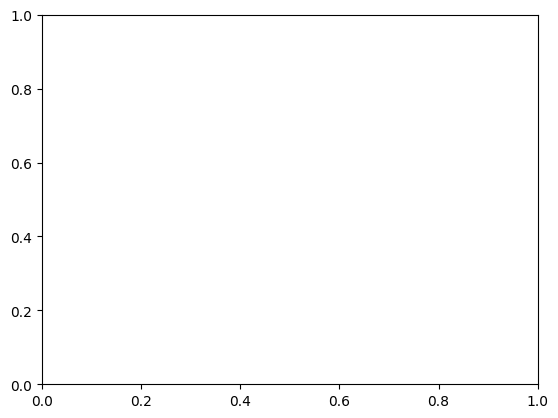

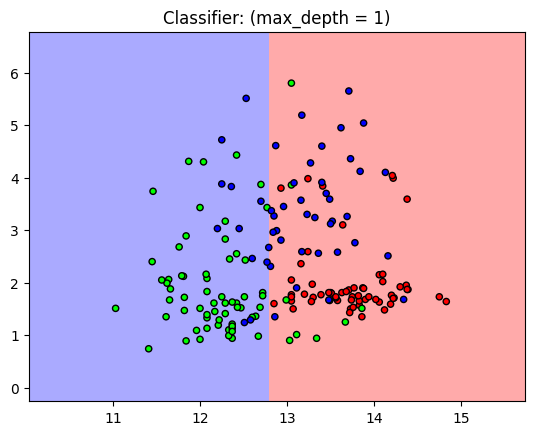

In [4]:
# 定义图像中分区的颜色和散点的颜色

cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_blod = ListedColormap(['#FF0000','#00FF00','#0000FF'])

# 分别用样本的两个特征创建图像和横轴和纵轴
x_min, x_max = X_train[:,0].min() - 1, X_train[:,0].max() + 1
y_min, y_max = X_train[:,1].min() - 1, X_train[:,1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, .02),
    np.arange(y_min, y_max, .02)
)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# 用三点把样本表示出来
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_blod, edgecolors='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier: (max_depth = 1)")

plt.show()

【结果分析】很显然，最大深度等于 1 时分类器等表现肯定不会太好，

分类器只分了两类。我们需要加大深度试试看结果会有什么变化。

In [5]:
# 设定决策树分类器最大深度为 3
clf2 = tree.DecisionTreeClassifier(max_depth=3)
# 拟合训练数据集
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

这次我们让 max_depth=3， 同样再进行绘制

<ipython-input-7-3671a95e304c>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


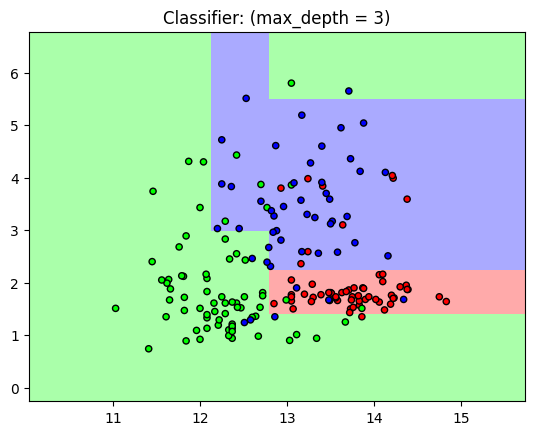

In [7]:
# 定义图像中分区的颜色和散点的颜色

cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_blod = ListedColormap(['#FF0000','#00FF00','#0000FF'])

# 分别用样本的两个特征创建图像和横轴和纵轴
x_min, x_max = X_train[:,0].min() - 1, X_train[:,0].max() + 1
y_min, y_max = X_train[:,1].min() - 1, X_train[:,1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, .02),
    np.arange(y_min, y_max, .02)
)

Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# 用三点把样本表示出来
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_blod, edgecolors='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier: (max_depth = 3)")

plt.show()

【结果分析】现在我们看到，当决策树最大深度为 3 当时候，

分类器能够进行 3 个分类的识别，而且大部分数据点的分类都进入了正确的分类，

当然还有一小部分数据点的分类是错误的，接下来我们进一步调整 max_depth 的值

看会有怎样的变化。

In [8]:
# 设定决策树分类器最大深度为 5
clf3 = tree.DecisionTreeClassifier(max_depth=5)
# 拟合训练数据集
clf3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

这次我们让 max_depth=5， 继续进行绘制


<ipython-input-9-e9239a2a0f93>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


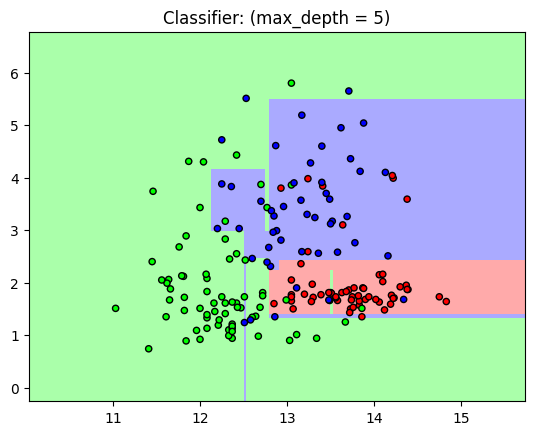

In [9]:
# 定义图像中分区的颜色和散点的颜色

cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_blod = ListedColormap(['#FF0000','#00FF00','#0000FF'])

# 分别用样本的两个特征创建图像和横轴和纵轴
x_min, x_max = X_train[:,0].min() - 1, X_train[:,0].max() + 1
y_min, y_max = X_train[:,1].min() - 1, X_train[:,1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, .02),
    np.arange(y_min, y_max, .02)
)

Z = clf3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# 用三点把样本表示出来
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_blod, edgecolors='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier: (max_depth = 5)")

plt.show()

【结果分析】现在可以看到，分类器的表现进一步提升了。

它在更加努力地把每一个数据点放入正确的分类当中。

可能很多读者朋友会感到好奇，在这个过程中，决策树在每一层当中都做了哪些事情呢？

我们可以用一个名叫 graphviz 的库来展示一下这个过程，

首先需要安装这个库。在命令提示符中输入

In [ ]:
# !pip3 install graphviz

In [16]:
# 导入 graphviz 工具
import graphviz
# 导入决策 树中输出 graphviz 的接口
from sklearn.tree import export_graphviz
# 选择最大深度为 3 的分类模型
export_graphviz(clf2, out_file="wine.dot", class_names=wine.target_names,
feature_names=wine.feature_names[:2], impurity=False, filled=True)

# 打开一个dot文件
with open("wine.dot") as f:
    dot_graph = f.read()

    graphviz.Source(dot_graph)



【结果分析】图中非常清晰地展现了决策树是如何预测的，

这种展示方式非常便于我们向非专业人士来解释算法是如何进行工作的。

### 决策树的优势和不足

相比其他算法，决策树有一个非常大的优势，就是可以很容易地将模型进行可视化。

这样就可以让非专业人士也可以看的明白。

另外，由于决策树算法对每个样本特征进行单独处理，

因此并不需要对数据进行转换（数据转换的概念我们会在第 10 章为大家介绍）。

这样一来，如果使用决策树算法的话，我们几乎不需要对数据进行预处理。

这也是决策树算法的一个有点。

当然，决策树算法也有它不足之处 -- 即便我们在建模的时候可以使用类似 max_depth 

或是 max_leaf_nodes 等参数来对决策树进行预剪枝处理，但它还是不可避免会出现拟合的问题，

也就是模型的泛化性能大打折扣了。

为了避免过拟合的问题出现，可以使用集合学习的方法，

也就是我们下面要介绍的 -- 随机森林算法。

## 随机森林

常言道，不要为了一棵树放弃一片森林。

这句话在机器学习算法方面也是非常正确的。

虽然决策树算法简单易理解，而且不需要对数据进行转换，

但是它的缺点也很明显 -- 决策树往往容易出现过拟合的问题。

不过这难不倒我们， 因为我们可以让很多树组成团队来工作，

也就是 -- 随机森林。

### 随机森林的基本概念

先来一段比较官方的解释：随机森林有的时候也被为是随机决策森林，

是一种集合学习方法， 既可以用于分类，也可以用于回归。

而所谓集合学习算法，其实就是把多个机器学习算法综合在一起，

制造出一个更加大模型的意思。

这也就是很好地解释了为什么这种算法称为随机森林了，如图所示，因为“有很多树”嘛！

在机器学习的领域，其实有很多中集合算法，目前应用比较广泛的就包括随机森林（Rondom Forests）

和梯度上升决策树（Gradient Boosted Decision Tress，GBDT）。

本书主要讲的是随机森林算法。

前面我们提到，决策树算法很容易出现过拟合的现象。

那为什么随机森林可以解决这个问题呢？

因为随机森林是把不同的几棵决策树打包到一起，

每棵树的参数都不相同，然后我们把每棵树预测的结果取平均值，

这样即可以保留决策树们的工作成效，又可以降低过拟合的风险。

这其实也是可以用数学方法推导出来，不过我们一如既往地，

不会讨论数学公式， 接下来直接进入随机森林的构建环节。

### 随机森林的构建

In [17]:
# 导入随机森林模型
from sklearn.ensemble import RandomForestClassifier

# 载入红酒数据集
wine = datasets.load_wine()
# 选择数据集前两个特征
X = wine.data[:,:2]
y = wine.target

# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 设定随机森林中有 6 颗树
forest = RandomForestClassifier(n_estimators=6, random_state=3)
# 使用模型拟合数据
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=6, random_state=3)

【结果分析】可以看到，随机森林向我们返回了包含其自身全部参数的信息，

让我们返回了包含其自身全部参数的信息，让我们重点看一下其中几个必要重要的参数。

首先是 bootstrap 参数，代表的是 bootstrap sample，也就是 “有放回抽样” 的意思，

指每次从样本空间中可以重复抽取同一个样本（因为样本中在第一次被抽取之后又被放回去了），

形象一点来说，如原始样本是 ['苹果', '西瓜', '香蕉', '桃子']，那么经过 bootstrap sample 

重构就可能是['西瓜', '西瓜', '香蕉', '桃子']，还有可能是 ['苹果', '西瓜', '香蕉', '桃子']，

bootstrap sample 生成的数据集和原始数据集在数据量上是完全一样的，

但由于进行了重复采样，因此其中有一些数据点会丢失。

看到这里，读者可能会问为什么要生成 bootstrap sample 数据集。

这是因为通过重新生成数据集，可以让随机森林中的每一颗决策树在构建的时候，

会彼此之间有些差异。 再加上每棵树的节点都会去选择不同的样本特征，经过这两步动作之后，

可以完全肯定随机森林中的每棵树都不一样，这也符合我们使用随机森林的初衷。

接下来模型会基于新数据建立一颗决策树，在随机森林当中，算法不会让每棵决策树都生成最佳的节点，

而是会在每个节点上随机地选择一些样本特征，然后让其中之一有最好的拟合表现。

在这里， 我们是用 max_features 这个参数来控制所选择的特征数量最大值的，

在不进行指定的情况下，随机森林默认自动选择最大特征数量。

而关于 max_features 参数的设置， 还是有些讲究的。

假如把 max_features 设置为样本全部的特征数 n_features 就意味着模型会在全部特征中进行筛选，

这样在特征选择这一步，就没有随机性可言了。

而如果把 max_features 的值设为 1，就意味着模型在数据特征上完全没有选择的余地，

只能去寻找这 1 个被随机选出来的特征向量的阈值了。

所以说，max_features 的取值越高，随机森林里的每一颗决策树就会 “长得很像”，

它们因为有更多的不同特征可以选择，也就会更容易拟合数据；

反之，如果 max_features 取值越低， 就会迫使每棵树的样子更加不同，

而且因为特征太少，决策树们不得不制造更多节点来拟合数据。

另外还有一个要强调的参数， 是 n_estimators, 这个参数控制的是随机森林中决策树的数量。

在随机森林构建完成之后，每棵决策树都会单独进行预测。

如果是用来进行回归分析的话， 随机森林会把所有决策树预测的值取平均数；

如果是用来进行分类的话，在森林内部会进行“投票”，每棵树预测出数据类别的概率，

比如其中一颗树说， “这瓶酒 80% 属于 class_1”, 

另外一颗树说，“这瓶酒 60% 属于 class_2”,

随机森林会把这些概率取平均值， 然后把样本放入概率最高的分类当中。

下面我们用图像直观地看一下随机森林分类的表现。



<ipython-input-18-fc4ae2db555b>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


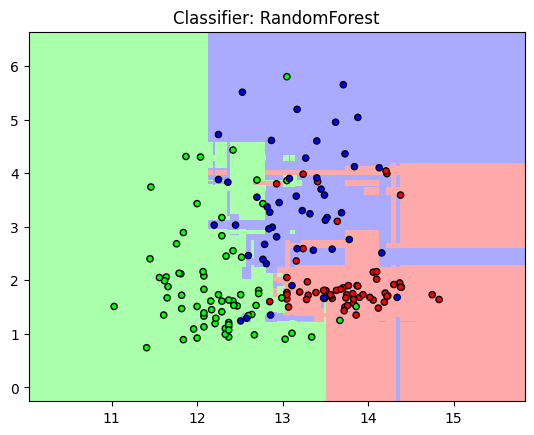

In [18]:
# 定义图像中分区的颜色和散点的颜色

cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_blod = ListedColormap(['#FF0000','#00FF00','#0000FF'])

# 分别用样本的两个特征创建图像和横轴和纵轴
x_min, x_max = X_train[:,0].min() - 1, X_train[:,0].max() + 1
y_min, y_max = X_train[:,1].min() - 1, X_train[:,1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, .02),
    np.arange(y_min, y_max, .02)
)

Z = forest.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# 用散点图把样本表示出来
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_blod, edgecolors='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier: RandomForest")

plt.show()

【结果分析】如果把图之前 max_depth = 5 的图对比， 可以发现随机森林所进行的分类要更加细腻一些，

对训练数据集的拟合更好。读者朋友可以自己试试调节 n_estimator 参数和 random_state 参数，

看看分类器的表现会有怎样的变化。

### 随机森林的优势和不足

目前在机器学习领域，无论是分类还是回归，随机森林都是应用最广泛的算法之一。

可以说随机森林十分强大，使用决策树并不需要用户过于在意参数的调节。

而且，和决策树一样，随机森林算法也不要求对数据进行预处理。

从优势的角度来说，随机森林集成了决策树的所有优点，

而且能够弥补决策树的不足。但也不是说决策树算法就被抛弃了。

从便于展示决策过程的话，还是需要用到决策树的。

还有，随机森林算法支持并行处理。

对于超大数据集来说，随机森林会比较耗时（毕竟要建立很多耗时决策树），

不过我们可以用多进程并行处理的方式来解决这个问题。

实现方式是调节随机森林的 n_jobs 参数，

记得把 n_jobs 参数数值设为和 CPU 内核数一致，

比如你的 CPU 内核数是 2， 那么 n_jobs 参数设为 3 

或者更大是没有意思的。当然如果你搞不定清楚自己的 CPU 到底就多少内核，

可以设置 n_jobs = -1, 这样随机森林会使用 CPU 的全部内核，

速度就会极大提升了。

需要注意的是，因为随机森林生成每棵树决策树的方法是随机的（所以名字叫随机森林嘛），

那么不同的 random_state 参数会导致模型完全不同，所以如果不希望建模的结果太过于不稳定，

一定要固化 random_state 这个参数的数值。

不过，虽然随机森林有诸多优点，尤其是并行处理功能在处理超大数据集时能提供良好的性能表现。

但它也有不足，例如对于超高维数据集、稀疏数据集等来说，随机森林就有点捉襟见肘了，

在这种情况下，线性模型要比随机森林的表现更好一些。

还有随机森林相对更消耗内存，速度也比线性模型要慢，

所以如果程序更节省内存和时间的话，建议还是选择线性模型。

## 随机森林实例 -- 要不要和相亲对象进一步发展

### 数据集的准备

网上有一个著名的数据集 -- 成年人数据集，包括了数万条样本数据。

其中，样本特征包括年龄、工作单位性质、统计权重、学历、受教育时长、

婚姻状态、职业、家庭情况、种族、性别、资产所得、资产损失、每周工作时长、

原籍、收入 （大于 5 万或者小于等于 5 万）。

这个数据集用来帮小 Q 做决策真是再合适不过了。

于是小 C 去下载了这个数据集，下载地址如下：

http://archive.ics.uci.edu/ml/machine-learning-databases/adult/

下载好的数据集是 .data 格式的文件, 不过不用担心， 它其实就是一个 csv 文件，

我们可以把它重命名为 adult.csv, 这样可以直接用 Excel 打开。

现在来看一下打开后的样子， 如图。。。

可以看出，从左数第一列时样本人群的年龄；

第二列时样本人群的工作单位性质；

第三列是fnlwgt -- final weight,是一个统计用的权重值；

然后依次是学历、受教育时长、婚姻状况、职业、家庭情况、种族、性别、

资产所得、资产损失、周工作时长、原国籍和收入。

In [20]:
# 导入 pandas 库
import pandas as pd

# 用 pandas 打开 csv 文件
data = pd.read_csv('./data/adult.csv', header=None, index_col=False,
    names=['年龄', '单位性质', '权重', '学历', '受教育时长',
    '婚姻状态', '职业', '家庭情况', '种族', '性别', 
    '资产所得', '资产损失', '周工作时长','原籍', '收入'])

# 为了方便展示，我们选取其中一部分数据
data_lite = data[['年龄', '单位性质', '学历', '周工作时长','职业', '收入']]

# 下面我们看一下数据的前 5 行是不是我们想要的结果
display(data_lite.head())

,年龄,单位性质,学历,周工作时长,职业,收入
0,39,State-gov,Bachelors,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,<=50K
2,38,Private,HS-grad,40,Handlers-cleaners,<=50K
3,53,Private,11th,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,40,Prof-specialty,<=50K


### 用 get_dummies 处理数据

看到这里，可能有读者朋友会问一个问题，在现在这个数据集中，

单位性质、学历、性别、职业还有收入都不是整形数值，而是字符串，

怎么使用我们现在所学的知识进行建模呢？这里我们要用到 pandas 的一个功能，

叫作 get_dummies, 它可以在现有的数据集上添加虚拟变量，

让数据集变成可用的格式。这个方法我们在后面的章节还会详细讲解，

现在我们先使用它就好了。

In [21]:
# 使用 get_dummies 将文本数据转化为数值
data_dummies = pd.get_dummies(data_lite)
# 对比样本原始特征和虚拟变量特征

print('样本原始特征：\n', list(data_lite.columns), '\n')
print('虚拟变量特征：\n', list(data_dummies.columns), '\n')

样本原始特征：
 ['年龄', '单位性质', '学历', '周工作时长', '职业', '收入'] 

虚拟变量特征：
 ['年龄', '周工作时长', '单位性质_ ?', '单位性质_ Federal-gov', '单位性质_ Local-gov', '单位性质_ Never-worked', '单位性质_ Private', '单位性质_ Self-emp-inc', '单位性质_ Self-emp-not-inc', '单位性质_ State-gov', '单位性质_ Without-pay', '学历_ 10th', '学历_ 11th', '学历_ 12th', '学历_ 1st-4th', '学历_ 5th-6th', '学历_ 7th-8th', '学历_ 9th', '学历_ Assoc-acdm', '学历_ Assoc-voc', '学历_ Bachelors', '学历_ Doctorate', '学历_ HS-grad', '学历_ Masters', '学历_ Preschool', '学历_ Prof-school', '学历_ Some-college', '职业_ ?', '职业_ Adm-clerical', '职业_ Armed-Forces', '职业_ Craft-repair', '职业_ Exec-managerial', '职业_ Farming-fishing', '职业_ Handlers-cleaners', '职业_ Machine-op-inspct', '职业_ Other-service', '职业_ Priv-house-serv', '职业_ Prof-specialty', '职业_ Protective-serv', '职业_ Sales', '职业_ Tech-support', '职业_ Transport-moving', '收入_ <=50K', '收入_ >50K'] 



【结果分析】大家可以看到， get_dummies 很聪明， 它把字符串类型的特征拆分开，

如把单位性质分为 “单位性质_Federal-gov”“单位性质_Local-gov”等，

如果样本人群的工作单位是联邦政府，那么“单位性质_Federal-gov”这个特征就是 1，

而其他的工作单位性质特征就是 1， 而其他的工作单位性质特征就会是0，

这样就把字符串巧妙地转换成了 0 和 1 这两个整形数值。

下面我们看下进行 get_dummies 后数据集的样子。

In [22]:
data_dummies.head()

,年龄,周工作时长,单位性质_ ?,单位性质_ Federal-gov,单位性质_ Local-gov,单位性质_ Never-worked,单位性质_ Private,单位性质_ Self-emp-inc,单位性质_ Self-emp-not-inc,单位性质_ State-gov,...,职业_ Machine-op-inspct,职业_ Other-service,职业_ Priv-house-serv,职业_ Prof-specialty,职业_ Protective-serv,职业_ Sales,职业_ Tech-support,职业_ Transport-moving,收入_ <=50K,收入_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


从图中可以看出，新的数据集已经扩充到了 44 列，原因就是 get_dummies 把原数据集

的特征拆分成了很多列。现在我们把各列分配给特征向量 X 和分类标签 y, 

In [23]:
# 定义数据集的特征值
features = data_dummies.loc[:, '年龄': '职业_ Transport-moving']

# 将特征值赋值为 X
X = features.values
# 将收入大于 50k 作为预测目标
y = data_dummies['收入_ >50K'].values

print('特征形态：{} 标签形态：{}'.format(X.shape, y.shape))


特征形态：(32561, 42) 标签形态：(32561,)


在这段代码中，我们让特征为 “年龄”这一列到 “职业_ Transport-moving”这一列，

而标签 y 是 “收入 _>50k”这一列，如果大于 50k，则 y=1，反之y=0.

运行代码会得到如上所示

### 用决策树建模并做出预测

现在可以清晰看出，数据集中共有 32561 条样本数据，每条数据有 44 个特征值，

下面就到了大家最熟悉的地方--将数据集拆分成训练集和测试集，

然后用决策树算法进行建模，并对模型进行评估。

In [24]:
# 将数据集拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 用最大深度为5的随机森林拟合数据
go_dating_tree = tree.DecisionTreeClassifier(max_depth=5)
go_dating_tree.fit(X_train, y_train)

print('模型得分：{:.2f}'.format(go_dating_tree.score(X_test, y_test)))

模型得分：0.79


【结果分析】可以看到，基于训练数据集训练的模型在测试集得到了 0.79 的评分，

可以说还是可以接受的，也就是说这个模型的预测准确率在 79%，

相信完全可以给小 Q 提供足够的参考了。

通过小 Q 的描述，我们知道 Mr.Z 年龄是 37 岁， 在省机关工作，

学历是硕士，性别男（当然了......），每周工作 40 小时，

职业是文员，现在我们把对他的收入进行预测。

In [27]:
# 将 Mr.Z 的数据输入给模型
Mr_Z = [[37, 40, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
# 使用模型做出预测
dating_dec = go_dating_tree.predict(Mr_Z)

if dating_dec == 1:
    print("大胆去追求真爱吧，这哥们月薪过 5 万了!")
else:
    print("不用去了，不满足你的要求")

不用去了，不满足你的要求


【结果分析】是的，机器冷冰冰地告诉小 Q 这个残酷的事实，Mr.Z 并不符合她的要求。

当然，出于常识，我们也能清楚省机关的文职工作人员的收入不太可能超过 5 万，

否则反腐工作就没什么成效了。

以上是使用决策树的一个实例，读者朋友可以试着用同样的数据集，使用随机森林算法再进行一遍预测，

看看结果是否会有所不同。

## 小结

在本章中，我们先设定了一个问题：小 Q 要不要和相亲对象进一步交往。

基于这个应用场景我们介绍了决策树和随机森林的原理、用法、以及优势不足等。

在掌握了这两个算法之后，我们用 adult 数据集训练了决策树模型，

并帮助小 Q 做出了一次判断，希望读者朋友可以自己动手试试看调节各项参数对结果有什么影响。

此外，除了上述我们讲解等功能，决策树和随机森林还有一个特别 “体贴”等功能，

就是可以帮助用户在数据集中对数据特征对重要性进行判断。

这样以来，我们还可以通过这两个算法对高维数据集进行分析，

在诸多特征中保留最重要的几个，这样也便于我们对数据进行降维处理。

这部分内容我们在第 11 掌中还会详细的讲解。

当然，目前应用广泛的集成算法还有“梯度上升决策树”（Gradient Boosting Decision Trees, GBDT）,

限于篇幅本章暂不详细讲解，感兴趣的读者朋友也可以到 scikit-learn 官网上查看相关的文档。